Context

An auto insurance company has collected some data about its customers including their demographics, education, employment, policy details, vehicle information on which insurance policy is, and claim amounts. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

Some business Objectives:

Retain customers,
Analyze relevant customer data,
Develop focused customer retention programs.
Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

# 1. Import the necessary libraries.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [8]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')
display(customer_df.shape)
customer_df.head()

(9134, 24)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


# 3. First look at its main features (head, shape, info).

In [9]:
customer_df.isnull().sum()/len(customer_df)
#ZERO null values across all columns

Customer                         0.0
State                            0.0
Customer Lifetime Value          0.0
Response                         0.0
Coverage                         0.0
Education                        0.0
Effective To Date                0.0
EmploymentStatus                 0.0
Gender                           0.0
Income                           0.0
Location Code                    0.0
Marital Status                   0.0
Monthly Premium Auto             0.0
Months Since Last Claim          0.0
Months Since Policy Inception    0.0
Number of Open Complaints        0.0
Number of Policies               0.0
Policy Type                      0.0
Policy                           0.0
Renew Offer Type                 0.0
Sales Channel                    0.0
Total Claim Amount               0.0
Vehicle Class                    0.0
Vehicle Size                     0.0
dtype: float64

In [10]:
customer_df.info()
#dtypes: float64(2), int64(6), object(16)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

# 4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores

In [11]:
cols = []
for i in range(len(customer_df.columns)):
    cols.append(customer_df.columns[i].lower().replace(' ', '_'))
customer_df.columns = cols

print(customer_df.columns)


Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')


# 5. Change effective to date column to datetime format.

In [12]:
#currently it's an object
customer_df['effective_to_date'] = pd.to_datetime(customer_df['effective_to_date'])

# 6. Define a function that differentiates between continuous and discrete variables. 

Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

In [13]:
# Which variables are continuous, and which are discrete?
# a quantitative variable may be continuous or discrete if they are typically obtained by measuring or counting, respectively.
# discrete: counts (e.g. the number of objects in a collection). 
# continuous: measurable amounts (weight, speed, income)

# In other words... 
# discrete variable is obtained by counting 
# continuous variable is obtained by measuring

# Discrete- 
# months_since_last_claim 
# months_since_policy_inception
# number_of_open_complaints
# number_of_policies

# Continuous
# customer_lifetime_value - 8041
# income- 5694
# monthly_premium_auto - 202
# total_claim_amount - 5105

In [14]:
numericals = customer_df.select_dtypes(np.number)
numericals.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879


In [15]:
numericals.isnull().sum()/len(numericals)

customer_lifetime_value          0.0
income                           0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
total_claim_amount               0.0
dtype: float64

In [16]:
#shows number of unique values per column,
numericals.nunique()

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

In [17]:
def cont_dis(df,limit):
    discrete = []
    continuous = []
    for col in df:
        if df[col].nunique() <= limit:
            discrete.append(col)
        else:
            continuous.append(col)
    return discrete,continuous

In [65]:
discrete_df, continuous_df = cont_dis(numericals,100)
print(discrete_df)
# print(continuous_df)

['months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies']


# 7. Plot a correlation matrix, comment what you see.

A correlation heatmap is a graphical representation of a correlation matrix representing the correlation 
between different variables. The value of correlation can take any value from -1 to 1

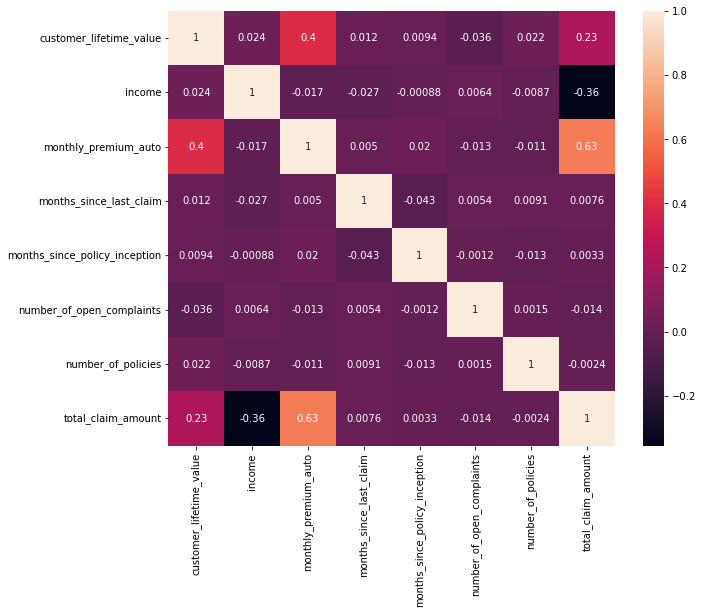

In [19]:
corr_matrix=customer_df.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [20]:
######################Comment########################

# We see a low correlation here
# 0.4 correlation between monthly_premium_auto and customer_lifetime_value (not significant)

# 0.63 correlation between monthly_premium_auto and total_claim_amount (also not so significant)

# Normally we try to look into values which is more than 0.90

########## Conclusion: no strong correlations overall, no features are extremely correlated #########

# 8. Create a function to plot every discrete variable. Do the same with the continuous variables 

(Be Careful, you may need to change the plot type to one better suited for continuous data!)
Comment what you can see in the plots.

# Plotting every discrete Variable

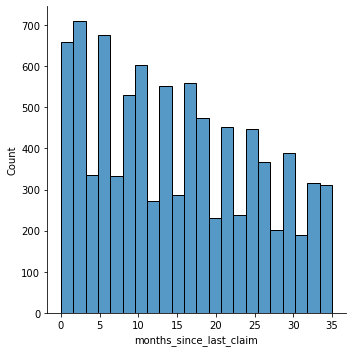

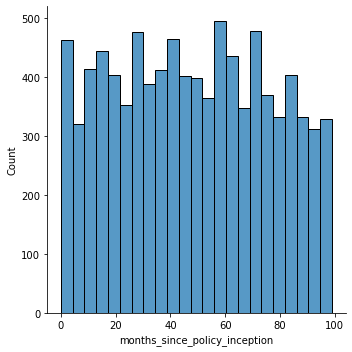

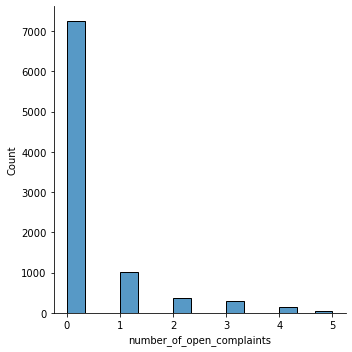

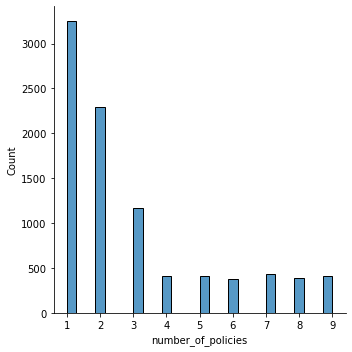

In [21]:
for column in numericals[discrete_df]:
    sns.displot(numericals[column])
    plt.show()

In [22]:
def disc_plot(df):
    for col in df[discrete_df]:
        sns.displot(df[col], kde=True)
        plt.show()

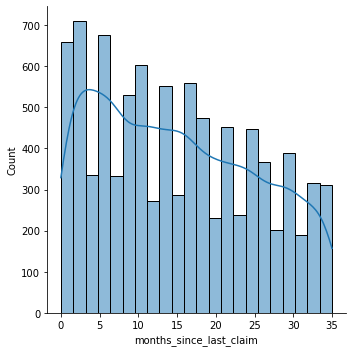

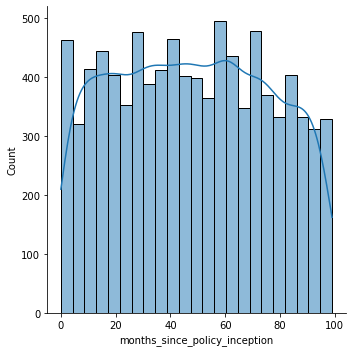

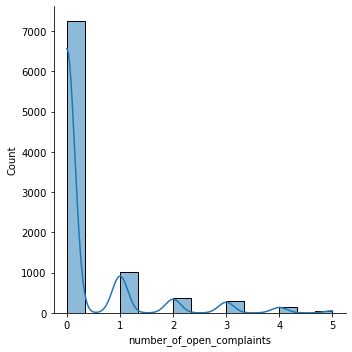

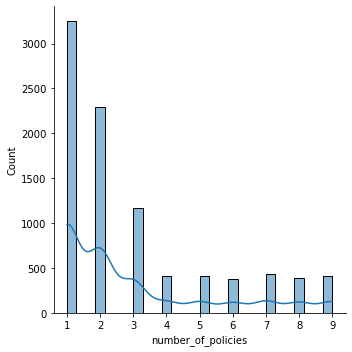

In [23]:
disc_plot(numericals)

In [24]:
def cont_plot(df):
    for col in df[continuous_df]:
        sns.histplot(df[col], kde=True)
        plt.show()

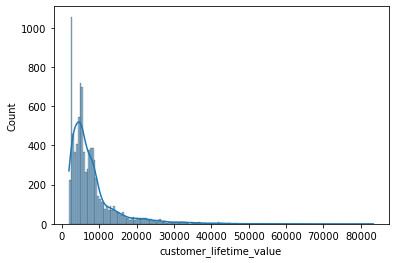

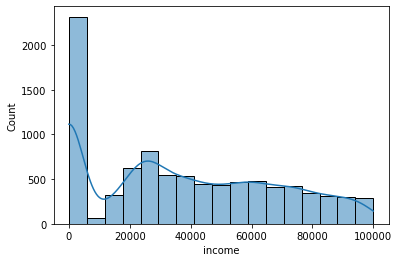

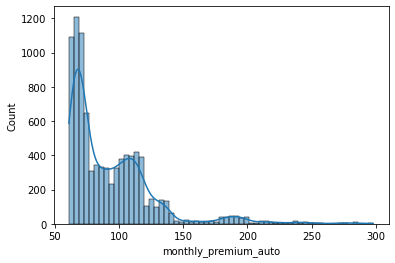

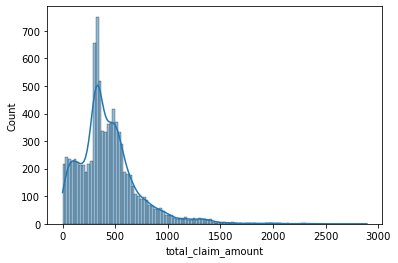

In [25]:
cont_plot(numericals)

In [26]:
#Comment what you can see in the above plots.

# all the continuous variables are skewed to the right
# number of open complaints and number of policies also skewed to the right


# 9. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [27]:
def cont_boxplot(df):
    for col in df[continuous_df]:
        sns.boxplot(df[col])
        plt.show()

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


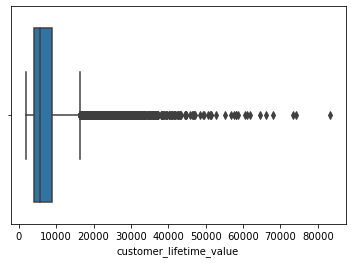

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


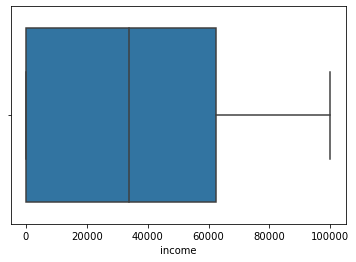

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


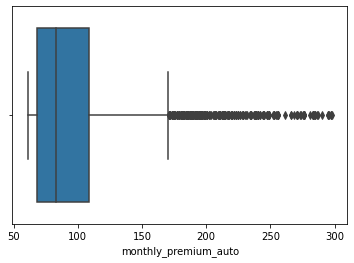

C:\Users\gau82\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


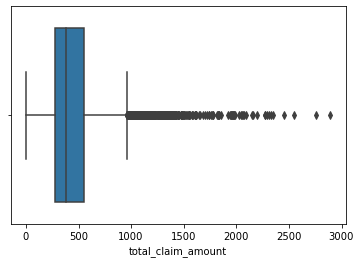

In [28]:
cont_boxplot(numericals)

# 10. Did you find outliers? Comment what you will do with them.

In [58]:
#In a boxplot, define outliers as those values past the whiskers (“max whisker”: Q3 + 1.5*IQR)

#customer_lifetime_value: outliers start around $15,000 and many through $65,000, with a few still $65-85,000

#Income has no outliers

#Total claim amount: outliers start around the $1000 value, and there are many of them, between 1000 and 2000, and 
#between 2000 and 2500

#monthly premium auto: max whisker starts at around $165/month, then from $165- 300 there are A LOT of outliers

# 11. Check all columns for NaN values. Decide what (if anything) you will need to do with them.

In [30]:
customer_df.isnull().sum()/len(customer_df)

#######  No nulls  #######

customer                         0.0
state                            0.0
customer_lifetime_value          0.0
response                         0.0
coverage                         0.0
education                        0.0
effective_to_date                0.0
employmentstatus                 0.0
gender                           0.0
income                           0.0
location_code                    0.0
marital_status                   0.0
monthly_premium_auto             0.0
months_since_last_claim          0.0
months_since_policy_inception    0.0
number_of_open_complaints        0.0
number_of_policies               0.0
policy_type                      0.0
policy                           0.0
renew_offer_type                 0.0
sales_channel                    0.0
total_claim_amount               0.0
vehicle_class                    0.0
vehicle_size                     0.0
dtype: float64

# Lab 2 | Cleaning categorical data

In [31]:
#1 Import the necessary libraries if you are starting a new notebook. 
#Using the same data as the previous lab: we_fn_use_c_marketing_customer_value_analysis.csv

# 2. Find all of the categorical data. Save it in a categorical_df variable.

In [32]:
categoricals_df = customer_df.select_dtypes(object)
display(categoricals_df.shape)
categoricals_df.head()

(9134, 15)

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# 3. Check for NaN values.

In [33]:
categoricals_df.isnull().sum()/len(categoricals_df)

customer            0.0
state               0.0
response            0.0
coverage            0.0
education           0.0
employmentstatus    0.0
gender              0.0
location_code       0.0
marital_status      0.0
policy_type         0.0
policy              0.0
renew_offer_type    0.0
sales_channel       0.0
vehicle_class       0.0
vehicle_size        0.0
dtype: float64

# 4 Check all unique values of columns.

In [34]:
categoricals_df.nunique() 

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

# 5. Check dtypes. Do they all make sense as categorical data?

In [35]:
categoricals_df.dtypes
#Yes they all make sense as categorical data

customer            object
state               object
response            object
coverage            object
education           object
employmentstatus    object
gender              object
location_code       object
marital_status      object
policy_type         object
policy              object
renew_offer_type    object
sales_channel       object
vehicle_class       object
vehicle_size        object
dtype: object

# 6. Does any column contain alpha and numeric data? Decide how to clean it.

In [36]:
# Yes, the Customer column contains 2 letters and then 5 numbers, like: BU79786 or QZ44356
# Does it need to be cleaned? WE can simply reset the index and use the index as the customer id instead of 
# the 7 digit alphanumeric or drop that Customer column as i donot see it impacting 
# our overall model at the later stage of evaluation!!

# 7. Would you choose to do anything else to clean or wrangle the categorical data? Comment your decisions.

In [37]:
categoricals_df.gender.value_counts(dropna=False)
categoricals_df.policy_type.value_counts(dropna=False)
categoricals_df.marital_status.value_counts(dropna=False)
categoricals_df.coverage.value_counts(dropna=False)
categoricals_df.employmentstatus.value_counts(dropna=False)
categoricals_df.education.value_counts(dropna=False)

# I wouldn't do anything else. The only column that has more than 10 uniques is customer. 
# We need to check at a later stage to retain or to drop it. 
# No null values, no strange inputs

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: education, dtype: int64

# 8. Compare policy_type and policy. What information is contained in these columns. Can you identify what is important?

In [38]:
categoricals_df.policy.value_counts(dropna=False)

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: policy, dtype: int64

In [39]:
categoricals_df.policy_type.value_counts(dropna=False)

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: policy_type, dtype: int64

In [40]:
##### Comment #####

# seems like the POLICY column just further breaks down the policy_type column into L1, L2, L3
# For each (personal, corporate, special), L3 has the most values

# 9. Check number of unique values in each column, can they be combined in any way to ease encoding? Comment your thoughts and make those changes.

In [41]:
categoricals_df.nunique() 

customer            9134
state                  5
response               2
coverage               3
education              5
employmentstatus       5
gender                 2
location_code          3
marital_status         3
policy_type            3
policy                 9
renew_offer_type       4
sales_channel          4
vehicle_class          6
vehicle_size           3
dtype: int64

# Lab 3 | Feature extraction

# 1. Open the categoricals variable we created before.

In [42]:
categoricals_df = categoricals_df.select_dtypes(object)
categoricals_df.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize


# 2. Plot all the categorical variables with the proper plot. What can you see?

In [43]:
def cat_var(df):
    for col in df:
        sns.displot(df[col], kde=True)
        plt.show()

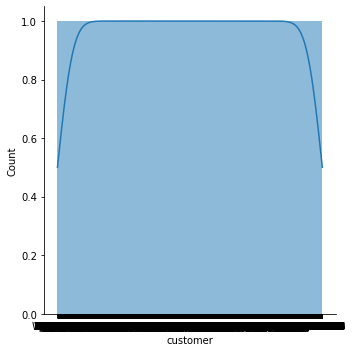

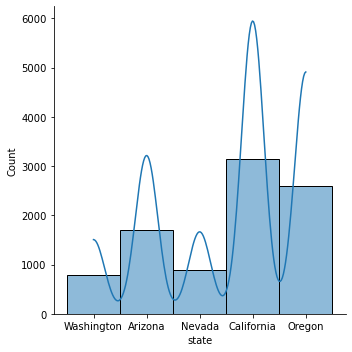

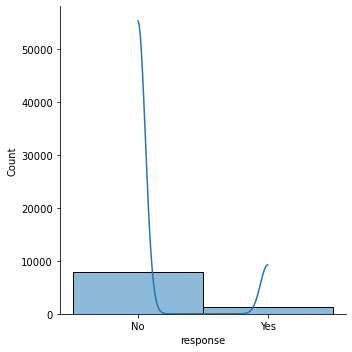

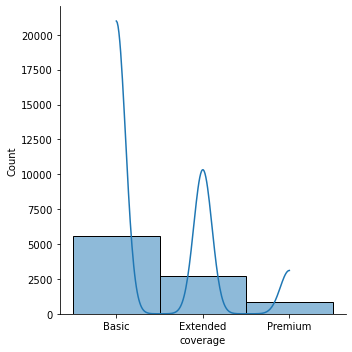

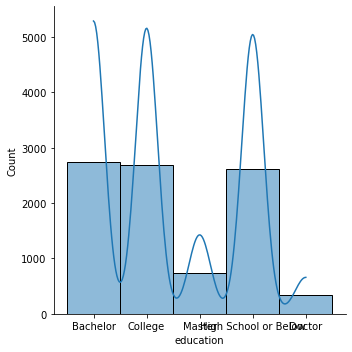

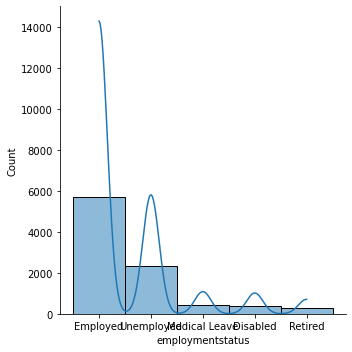

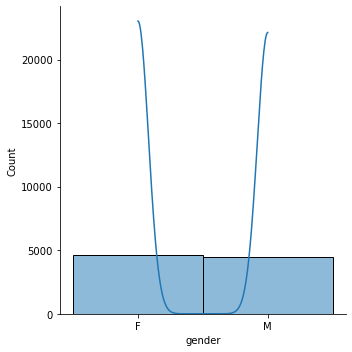

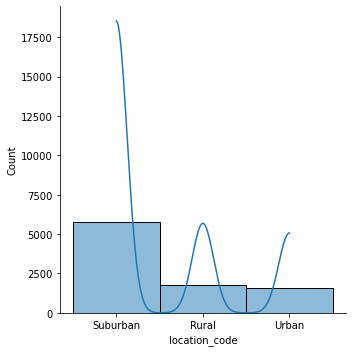

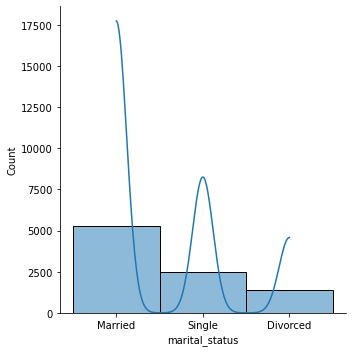

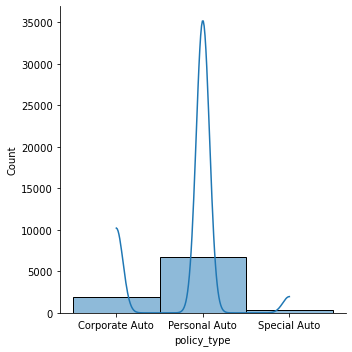

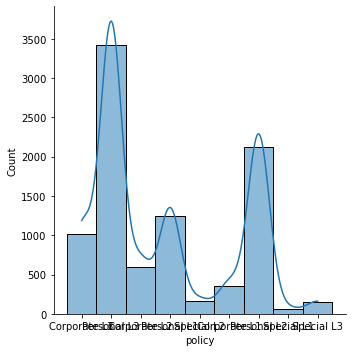

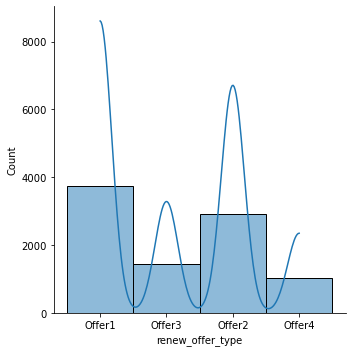

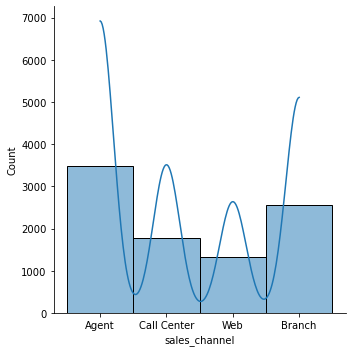

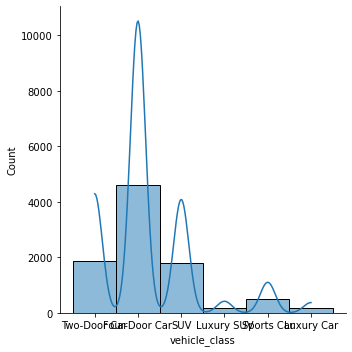

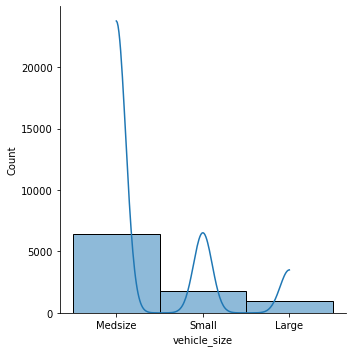

In [44]:
# cat_var(categoricals_df)

# 3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?

# 4. Plot time variable. Can you extract something from it?

In [45]:
customer_df['effective_to_date']

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

<AxesSubplot:xlabel='effective_to_date', ylabel='total_claim_amount'>

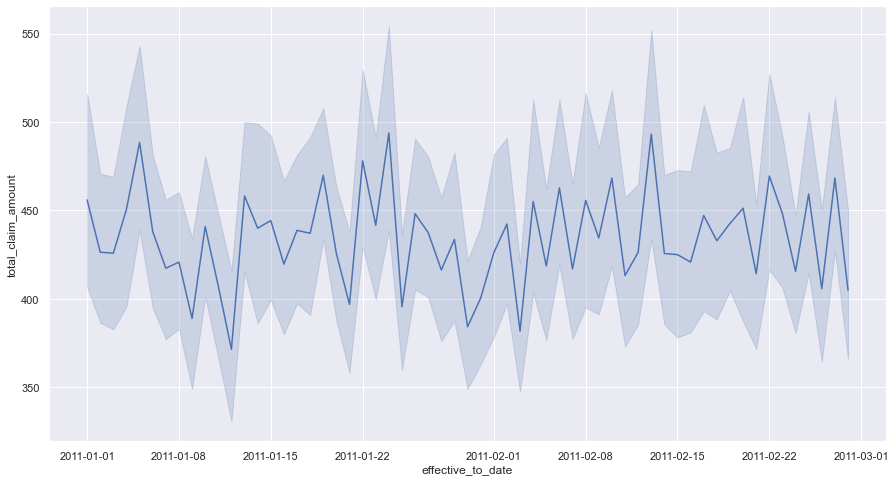

In [46]:
# sns.set(rc={'figure.figsize':(15,8)})
# sns.lineplot(x='effective_to_date', y="total_claim_amount", data= customer_df)

# Lab | Random variable distributions

Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

# 1. Get the numerical variables from our dataset.

In [83]:
display(numericals)

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [84]:
numericals.nunique() 

customer_lifetime_value          8041
income                           5694
monthly_premium_auto              202
months_since_last_claim            36
months_since_policy_inception     100
number_of_open_complaints           6
number_of_policies                  9
total_claim_amount               5106
dtype: int64

# 2. Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.

In [ ]:
# plots are already done in lab 2. Results as follows: 

Exponential (closer to): 

customer_lifetime_value- exponential

total_claim_amount- looks exponential/continuous


Normal (closer to): 

number_of_open_complaints

number_of_policies income
monthly_premium_auto
months_since_last_claim
months_since_policy_inception

# 3. Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In data analysis transformation is the replacement of a variable by a function of that variable: for example, replacing a variable x by the square root of x or the logarithm of x.

To reduce right skewness, take roots or logarithms or reciprocals (roots are weakest). This is the commonest problem in practice.

To reduce left skewness, take squares or cubes or higher powers.

In [87]:
def log_transfom_clean(x):
    if np.isfinite(x) and x!=0:   #if X is finite number (not Nan), and not 0, return log(x)
        return np.log(x)
    else:                       #otherwise return NaN
        return np.NAN

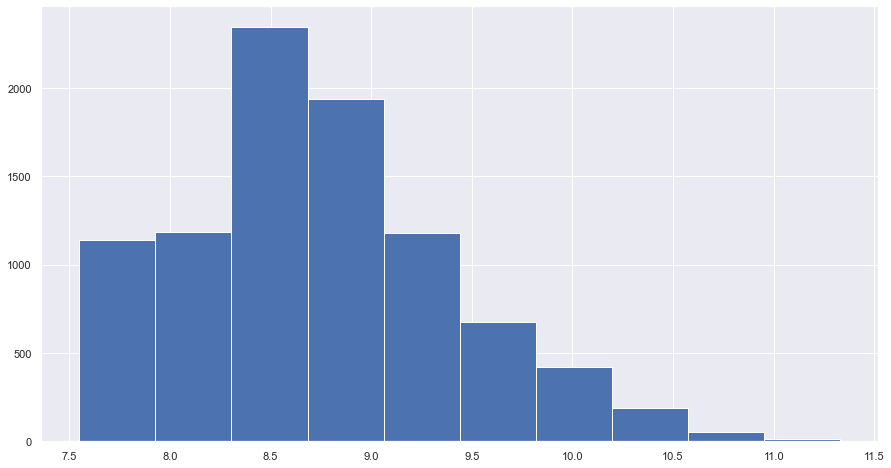

In [88]:
# now apply the function to each column and show the histogram 

pd.Series(numericals['customer_lifetime_value'].apply(log_transfom_clean)).hist()
plt.show()
# yes, this more normal now

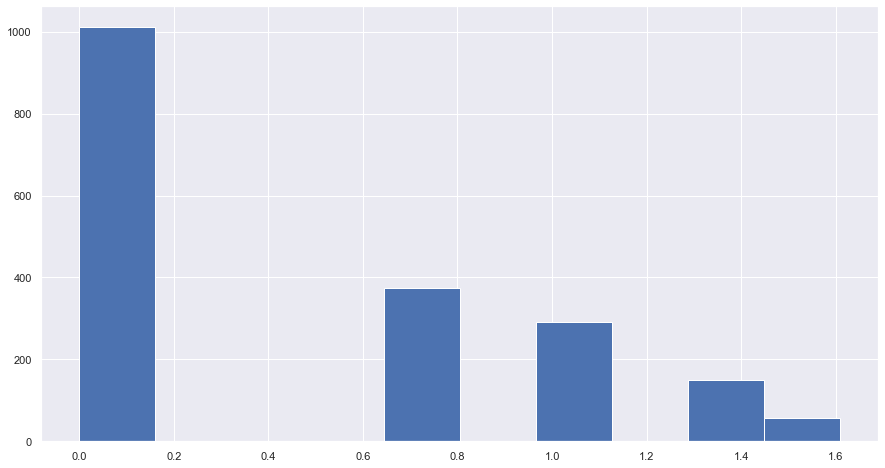

In [89]:
pd.Series(numericals['number_of_open_complaints'].apply(log_transfom_clean)).hist()
plt.show()

In [ ]:
# pd.Series(numericals['number_of_policies'].apply(log_transfom_clean)).hist()
# plt.show()

In [ ]:
# pd.Series(numericals['income'].apply(log_transfom_clean)).hist()
# plt.show()

In [ ]:
# pd.Series(numericals['monthly_premium_auto'].apply(log_transfom_clean)).hist()
# plt.show()

In [ ]:
# pd.Series(numericals['months_since_last_claim'].apply(log_transfom_clean)).hist()
# plt.show()

In [ ]:
# pd.Series(numericals['months_since_policy_inception'].apply(log_transfom_clean)).hist()
# plt.show()

In [90]:
from scipy.stats import boxcox

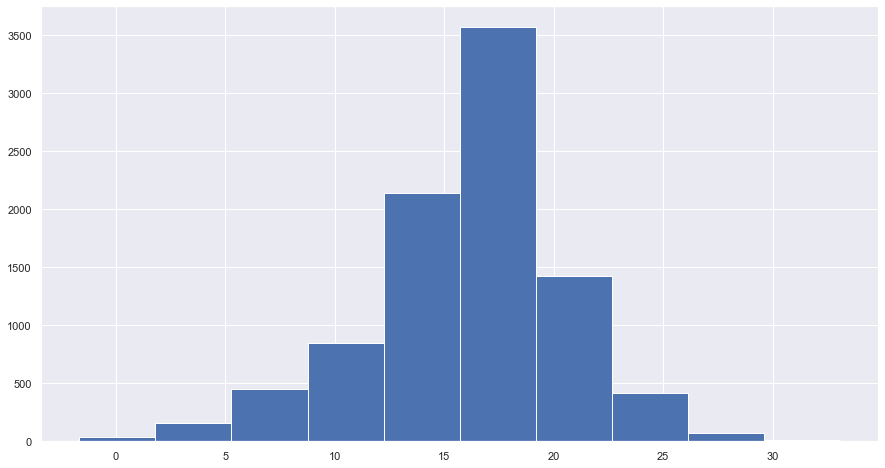

In [91]:
numericals['total_claim_amount'] = boxcox(numericals['total_claim_amount'], 0.3)
plt.hist(numericals['total_claim_amount'])
plt.show()

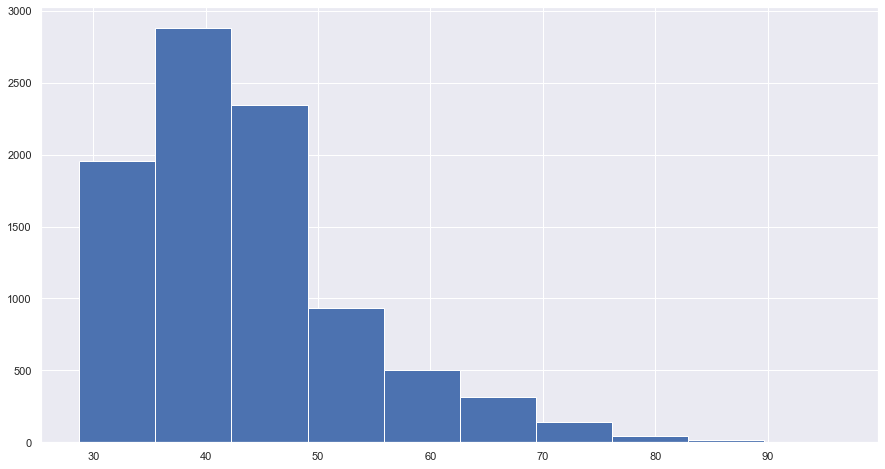

In [92]:
numericals['customer_lifetime_value'] = boxcox(numericals['customer_lifetime_value'], 0.3)
plt.hist(numericals['customer_lifetime_value'])
plt.show()

In [ ]:
# numericals['number_of_policies'] = boxcox(numericals['number_of_policies'], 0.3)
# plt.hist(numericals['number_of_policies'])
# plt.show()

In [ ]:
# numericals['monthly_premium_auto'] = boxcox(numericals['monthly_premium_auto'], 0.3)
# plt.hist(numericals['monthly_premium_auto'])
# plt.show()

# Lab 4 | Comparing regression models

In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

REMEMBER- total_claim_amount is the target!

# 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.

In [47]:
from sklearn.model_selection import train_test_split

In [54]:
X = customer_df.drop(['total_claim_amount'],axis=1)
y = customer_df['total_claim_amount']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

In [57]:
numericals.describe().T

#################### COMMENT #############

#Earlier we defined all numerical variables as "numericals" df so I will only look at numerical data for outliers, 
# cannot find mean, min, etc on categoricals!
#look at box plots of each column to get idea of outliers again

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [59]:
iqr = np.nanpercentile(customer_df['total_claim_amount'],75) - np.nanpercentile(customer_df['total_claim_amount'],25)
upper_limit = np.nanpercentile(customer_df['total_claim_amount'],75) + 1.5*iqr
print(upper_limit)

960.3997301249999


I won't be removing any outliers

First off, none of them seem to be due to errors in data intake, none of them are so "out there" that they give me concern that they could be incorrectly recorded data value Second, "If the extreme value is a legitimate observation that is a natural part of the population you’re studying, you should leave it in the dataset."

# 2. We will start with removing outliers, if you have not already done so. We have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.

######## Review outliers ########

customer_lifetime_value

monthly_premium_auto

total_claim_amount (THE TARGET!)

######### No outliers ########

income

months_since_last_claim

months_since_policy_inception

number_of_open_complaints

number_of_policies

In [ ]:
# Function to print without outliers (copied from Jesus)
# def rm_outliers(df):
#     iqr = np.percentile(df,75) - np.percentile(df,25)
#     upper_limit1 = np.percentile(df,75) + 1.5*iqr
#     lower_limit1 = np.percentile(df,25) - 1.5*iqr
#     df0 = df[(df>lower_limit1) & (df<upper_limit1)].copy()
#     sns.displot(df0,kde=True)        
#     return plt.show()


In [ ]:
# Function to remove outliers (copied from Simon)

# Function to remove outliers
# def rm_outliers(df, coef=1.5):
#     iqr = np.percentile(df,75) - np.percentile(df,25)
#     print(iqr, np.percentile(df,75))
#     upper_limit = np.percentile(df,75) + coef*iqr
#     lower_limit = np.percentile(df,25) - coef*iqr
#     if lower_limit>df.min():
#         return df[(df>=lower_limit) & (df<=upper_limit)].copy()
#     else:
#         return df[df<=upper_limit].copy() 

# 3. Create a copy of the dataframe for the data wrangling.

In [61]:
customer_df_copy = customer_df.copy()

customer_df_copy

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


# 4. Normalize the continuous variables. You can use any one method you want.

The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

In [79]:
# numericals_train = X_train.select_dtypes(np.number)
# numericals_test = X_test.select_dtypes(np.number)

# categoricals_train = X_train.select_dtypes(include = object)
# categoricals_test = X_test.select_dtypes(include = object)

In [80]:
# from sklearn.preprocessing import StandardScaler

# transformer = StandardScaler().fit(numericals_train)
# numericals_train_standardized = transformer.transform(numericals_train)
# numericals_test_standardized = transformer.transform(numericals_test)

In [86]:
# from sklearn.preprocessing import OneHotEncoder

# encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(categoricals_train)
# categoricals_train_encoded = encoder.transform(categoricals_train).toarray()
# categoricals_test_encoded = encoder.transform(categoricals_test).toarray()

In [82]:
X_num = X.select_dtypes(include = np.number)
X_cat = X.select_dtypes(include = object)

In [64]:
customer_df[continuous_df].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_lifetime_value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
monthly_premium_auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
total_claim_amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [66]:
from sklearn.preprocessing import minmax_scale

X_num[['customer_lifetime_value', 'income', 'monthly_premium_auto']] = minmax_scale(X_num[['customer_lifetime_value', 'income', 'monthly_premium_auto']])
X_num.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies
0,0.010629,0.562847,0.033755,32,5,0,1
1,0.062406,0.000000,0.139241,13,42,0,8
2,0.134960,0.487763,0.198312,18,38,0,2
3,0.070589,0.000000,0.189873,18,65,0,7
4,0.011245,0.438443,0.050633,12,44,0,1


# 5. Encode the categorical variables (See the hint below for encoding categorical data!!!)

######### DUMMY CODE ########

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})

given that column "coverage" in the dataframe "data" has three categories:

"basic", "extended", and "premium" and values are to be represented in the same order.

####### One-hot #######

state, marital status, policy type, policy, renew_offer_type, sales channel, vehicle class

####### Ordinal ######

vehicle size, coverage, employmentstatus, location code

######## Others#########

response, education, gender, marital status?

In [67]:
X_cat

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [68]:
#Ordinal Encoding

X_cat["coverage"] = X_cat["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
X_cat["employmentstatus"] = X_cat["employmentstatus"].map({"Unemployed": 0, "Employed" : 1})
X_cat["vehicle_size"] = X_cat["vehicle_size"].map({"Small" : 0, "Medsize": 1, "Large": 2 })
X_cat["location_code"] = X_cat["location_code"].map({"Rural": 0, "Suburban": 1, "Urban": 2})

#"basic", "extended", and "premium" and values are to be represented in the same order.

In [69]:
X_cat['vehicle_size']. value_counts()
X_cat['location_code']. value_counts()

1    5779
0    1773
2    1582
Name: location_code, dtype: int64

In [70]:
X_cat = X_cat.drop(['policy'], axis=1)  #can only run this once
#dropping the "policy" column like we discussed in categorical data cleaning lab

In [71]:
one_hot_cols = X_cat[['state', 'marital_status', 'policy_type', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'education', 'gender', 'response']]

one_hot_cols

,state,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,education,gender,response
0,Washington,Married,Corporate Auto,Offer1,Agent,Two-Door Car,Bachelor,F,No
1,Arizona,Single,Personal Auto,Offer3,Agent,Four-Door Car,Bachelor,F,No
2,Nevada,Married,Personal Auto,Offer1,Agent,Two-Door Car,Bachelor,F,No
3,California,Married,Corporate Auto,Offer1,Call Center,SUV,Bachelor,M,No
4,Washington,Single,Personal Auto,Offer1,Agent,Four-Door Car,Bachelor,M,No
...,...,...,...,...,...,...,...,...,...
9129,California,Married,Personal Auto,Offer2,Web,Four-Door Car,Bachelor,M,No
9130,California,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,College,F,Yes
9131,California,Single,Corporate Auto,Offer1,Branch,Four-Door Car,Bachelor,M,No
9132,California,Married,Personal Auto,Offer3,Branch,Four-Door Car,College,M,No


In [72]:
#One-Hot encoding

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='error', drop='first').fit(one_hot_cols)
cols = encoder.get_feature_names_out(input_features=one_hot_cols.columns)
columns_encoded = pd.DataFrame(encoder.transform(one_hot_cols).toarray(), columns=cols)
columns_encoded.head()

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,...,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,education_College,education_Doctor,education_High School or Below,education_Master,gender_M,response_Yes
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 6. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.

# 7. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.


In [73]:
# Need to put all the encoded categorical variables back into one dataframe 

X_cat_copy = pd.concat([columns_encoded, X_cat], axis=1)
X_cat_copy

# The 4 ordinal encoded variables are already in X_cat dataframe. Now need to replace the 9
# one-hot coded variables with their one-hot encoded changes

# Add to columns_encoded the ordinal_encoded?! 

# X_cat = columns_encoded

,state_California,state_Nevada,state_Oregon,state_Washington,marital_status_Married,marital_status_Single,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer2,renew_offer_type_Offer3,...,education,employmentstatus,gender,location_code,marital_status,policy_type,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Bachelor,1.0,F,1,Married,Corporate Auto,Offer1,Agent,Two-Door Car,1
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,Bachelor,0.0,F,1,Single,Personal Auto,Offer3,Agent,Four-Door Car,1
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,Bachelor,1.0,F,1,Married,Personal Auto,Offer1,Agent,Two-Door Car,1
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Bachelor,0.0,M,1,Married,Corporate Auto,Offer1,Call Center,SUV,1
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Bachelor,1.0,M,0,Single,Personal Auto,Offer1,Agent,Four-Door Car,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,Bachelor,1.0,M,2,Married,Personal Auto,Offer2,Web,Four-Door Car,1
9130,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,College,1.0,F,1,Divorced,Corporate Auto,Offer1,Branch,Four-Door Car,1
9131,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,Bachelor,0.0,M,1,Single,Corporate Auto,Offer1,Branch,Four-Door Car,1
9132,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,College,1.0,M,1,Married,Personal Auto,Offer3,Branch,Four-Door Car,2


In [81]:
X_cat_copy.dtypes

# dtypes = object

state_California                  float64
state_Nevada                      float64
state_Oregon                      float64
state_Washington                  float64
marital_status_Married            float64
marital_status_Single             float64
policy_type_Personal Auto         float64
policy_type_Special Auto          float64
renew_offer_type_Offer2           float64
renew_offer_type_Offer3           float64
renew_offer_type_Offer4           float64
sales_channel_Branch              float64
sales_channel_Call Center         float64
sales_channel_Web                 float64
vehicle_class_Luxury Car          float64
vehicle_class_Luxury SUV          float64
vehicle_class_SUV                 float64
vehicle_class_Sports Car          float64
vehicle_class_Two-Door Car        float64
education_College                 float64
education_Doctor                  float64
education_High School or Below    float64
education_Master                  float64
gender_M                          

# 8. Try a simple linear regression with all the data to see whether we are getting good results.

# 9. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

# 10. Use the function to check LinearRegressor and KNeighborsRegressor.

# 11. You can check also the MLPRegressor for this task!

# 12. Check and discuss the results.